# Lab 8: Clustering Techniques in Machine Learning

In this tutorial, we will explore three clustering techniques: **K-means clustering, K-medoids clustering, and hierarchical clustering**.

Clustering is an ***unsupervised learning technique*** used to group similar data points together based on their features. We can then understand how the points within the groups are similar to one another and different from those in other groups.

## Table of Contents
1. [Part 1. Exploratory Data Analysis](#part1)
2. [Part 2. K-means Clustering](#part2)
3. [Part 3. K-medoids Clustering](#part3)
4. [Part 4. Hierarchical Clustering](#part4)

## Part 1. Exploratory Data Analysis<a name="part1"></a>

Before applying clustering algorithms, it's useful to visualize the data to get a sense of how many clusters might exist.

### Plotting the Iris Dataset
Let's plot the first two features (Sepal Length and Sepal Width) of the Iris dataset.

```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Load the Iris dataset
iris = XXXX
X = XXXX
y = XXXX

# Plotting the first two features
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis', alpha=0.5)
plt.title("Iris Dataset: Sepal Length vs Sepal Width")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()
```

##### <font color='red'>**TRY IT**</font> &#x1f9e0;: Read in the Iris data (look back at previous labs if you forget how) and plot the data. Can you tell how many unique clusters there are just by visualizing these variables? Try plotting on two different features (Petal Length and Petal Width). Does this make a difference?

## Part 2: K-means Clustering<a name="part2"></a>

### Understanding K-means
K-means clustering is a partitioning method that divides a dataset into K distinct, non-overlapping subsets (clusters). The goal is to minimize the variance within each cluster.

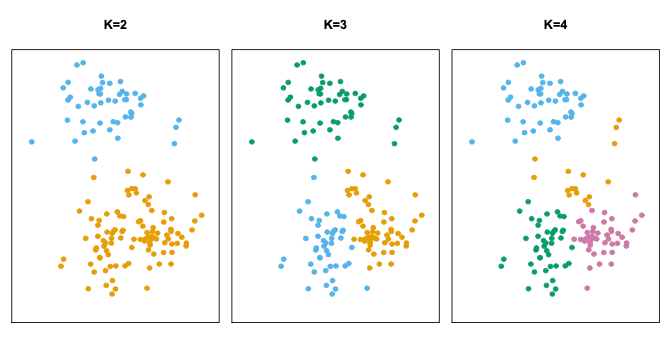



The algorithm follows these steps:
1. Initialize K centroids randomly from the dataset.
2. Assign each data point to the nearest centroid.
3. Update the centroids by calculating the mean of all points in each cluster.
4. Repeat steps 2 and 3 until convergence (i.e., when assignments no longer change).

### Implementation of K-means
Let's implement K-means clustering using the popular `sklearn` library and the Iris dataset.

```python
# Apply K-means
kmeans = KMeans(n_clusters=XXXX, random_state=0)
y_kmeans = kmeans.fit_predict(X)
```
##### <font color='red'>**TRY IT**</font> &#x1f9e0;: Pick a number of clusters and fit using `KMeans`.

### Visualization of Clusters

Now, let's visualize the clusters formed by K-means.

```python
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("K-means Clustering on Iris Dataset")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()
```
##### <font color='red'>**TRY IT**</font> &#x1f9e0;: Visualize the clusters you just produced. Do they seem reasonable? Go back and try a different value for `k` and visualize again. Do the clusters look better or worse?

## Part 3: K-medoids Clustering<a name="part3"></a>

K-medoids clustering is similar to K-means but uses actual data points as cluster centers (medoids) instead of calculating the mean. This makes K-medoids more robust to noise and outliers.

We can use the PAM (Partitioning Around Medoids) algorithm from the sklearn-extra library.

```python
!pip install numpy==1.26.4 # install a compatible version of numpy
!pip install scikit-learn-extra # the library is not pre-downloaded in Colab, so we use this code to do so
from sklearn_extra.cluster import KMedoids

# Apply K-medoids
kmedoids = KMedoids(n_clusters=XXXX, random_state=0)
y_kmedoids = kmedoids.fit_predict(X)
```
##### <font color='red'>**TRY IT**</font> &#x1f9e0;: Create clusters with K-Mediods and plot them. Do they look the same as K-Means? Which one would you decide to continue using?

## Part 4. Hierarchical Clustering<a name="part4"></a>

Hierarchical clustering creates a hierarchy of clusters. It can be done in two ways:

- **Agglomerative** (bottom-up): Starts with individual data points and merges them into larger clusters.
- **Divisive** (top-down): Starts with all data points in a single cluster and recursively splits them.

We will use the ***agglomerative*** approach. The code below uses `linkage='average'`, but you can change this variable out to any of the following options: `{‘ward’, ‘complete’, ‘average’, ‘single’}`. **Note**: `ward` is essentially the same as the "centroid" method discussed in class.

```python
from sklearn.cluster import AgglomerativeClustering

# Apply Hierarchical Clustering
# `distance_threshold=0` ensures we get to one final cluster
hierarchical = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='average')
y_hierarchical = hierarchical.fit_predict(X)
```

### Visualizing the Dengrogram
We can visualize the dendrogram and use it to decide how many clusters we want to use. The following function from sklearn visualizes the dendrogram.

```python
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    ''' Function (edited) from:
    https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
    '''

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    # create linkage matrix
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, color_threshold=0, above_threshold_color='black', **kwargs)

plot_dendrogram(hierarchical, truncate_mode="level", p=5) # p controls the cut off for the plot
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()
```


##### <font color='red'>**TRY IT**</font> &#x1f9e0;: Perform Hierarchical Clustering and visualize the dendrogram. How many clusters would be reasonable to use? Try a different linkage method and visualize again. How much did you tree change?

### Visualization of Clusters
Finally, let's cut off the clusters at our decided number, and visualize them.

```python
# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=XXXX)
y_hierarchical = hierarchical.fit_predict(X)

# visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_hierarchical, s=50, cmap='viridis')
plt.title("Hierarchical Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
```
##### <font color='red'>**TRY IT**</font> &#x1f9e0;: Re-run the clustering with the specified number of clusters you decided on. Then, visualize the clusters. Do you think you made the right choice for number of clusters? If not, try again.